In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = sns.load_dataset('iris')

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
from sklearn.preprocessing import LabelEncoder

In [9]:
encoder = LabelEncoder()

In [10]:
df['species'] = encoder.fit_transform(df['species'])

In [11]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
df = df[df['species'] != 0][['sepal_width','petal_length','species']]

In [13]:
df.head()

,sepal_width,petal_length,species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


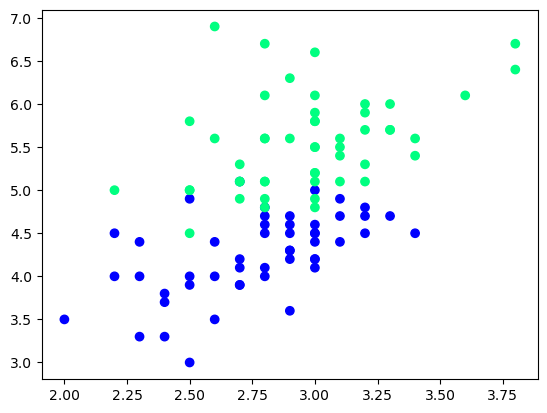

In [17]:
plt.scatter(df['sepal_width'], df['petal_length'], c= df['species'], cmap='winter')

In [18]:
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [19]:
df_train

,sepal_width,petal_length,species
97,2.9,4.3,1
135,3.0,6.1,2
61,3.0,4.2,1
79,2.6,3.5,1
68,2.2,4.5,1
100,3.3,6.0,2
53,2.3,4.0,1
64,2.9,3.6,1
81,2.4,3.7,1
120,3.2,5.7,2


In [20]:
x_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [22]:
df_bag = df_train.sample(8, replace=True)

x = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,sepal_width,petal_length,species
135,3.0,6.1,2
61,3.0,4.2,1
53,2.3,4.0,1
81,2.4,3.7,1
120,3.2,5.7,2
81,2.4,3.7,1
53,2.3,4.0,1
100,3.3,6.0,2


In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [24]:
df_bag1 = DecisionTreeClassifier()

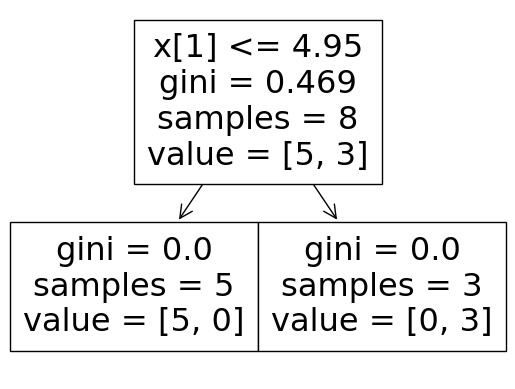

C:\Users\Nikita\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Nikita\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


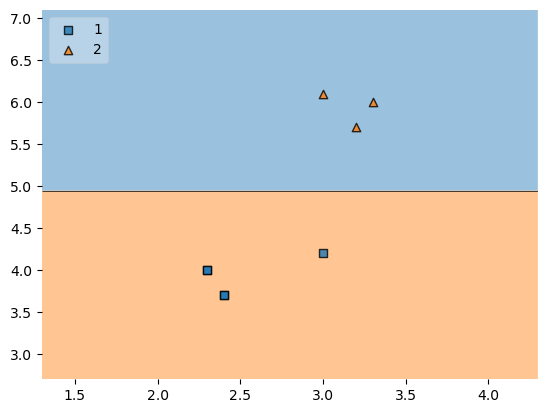

In [27]:
evaluate(df_bag1,x,y)

In [26]:
def evaluate(clf,x,y):
    clf.fit(x,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(x.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(x_test)
    print(accuracy_score(y_test, y_pred))

In [28]:
df_bag = df_train.sample(8, replace=True)
x = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1] 
df_bag

,sepal_width,petal_length,species
100,3.3,6.0,2
79,2.6,3.5,1
120,3.2,5.7,2
97,2.9,4.3,1
135,3.0,6.1,2
79,2.6,3.5,1
135,3.0,6.1,2
120,3.2,5.7,2


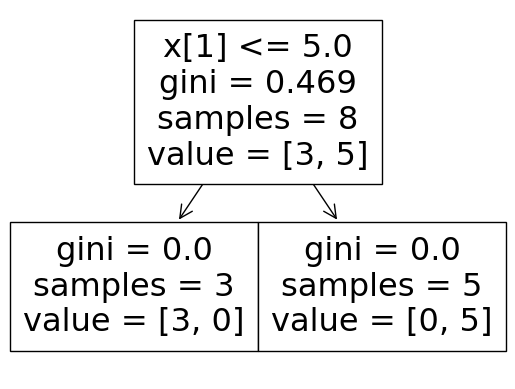

0.8


C:\Users\Nikita\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Nikita\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


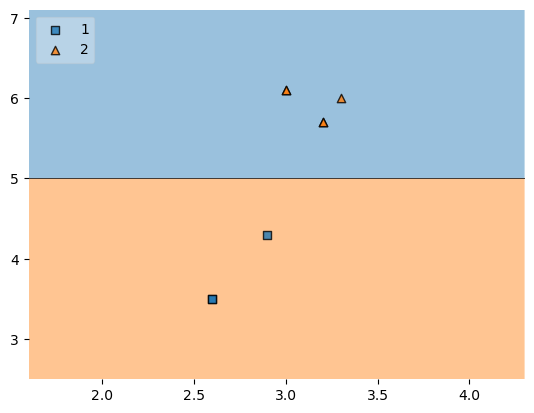

In [29]:
df_bag2 = DecisionTreeClassifier()
evaluate(df_bag2,x,y)

In [31]:
df_bag6 = df_train.sample(8, replace=True)

x = df_bag6.iloc[:,0:2]
y = df_bag6.iloc[:,-1]

df_bag6

,sepal_width,petal_length,species
61,3.0,4.2,1
79,2.6,3.5,1
53,2.3,4.0,1
120,3.2,5.7,2
81,2.4,3.7,1
53,2.3,4.0,1
64,2.9,3.6,1
53,2.3,4.0,1


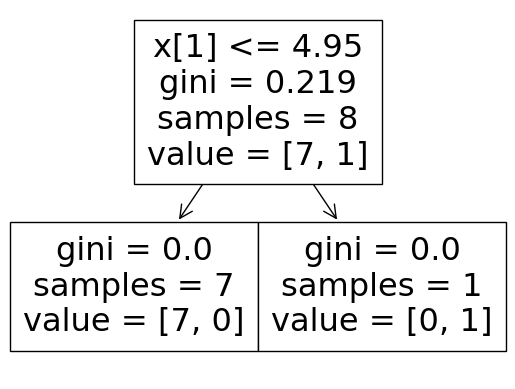

1.0


C:\Users\Nikita\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Nikita\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


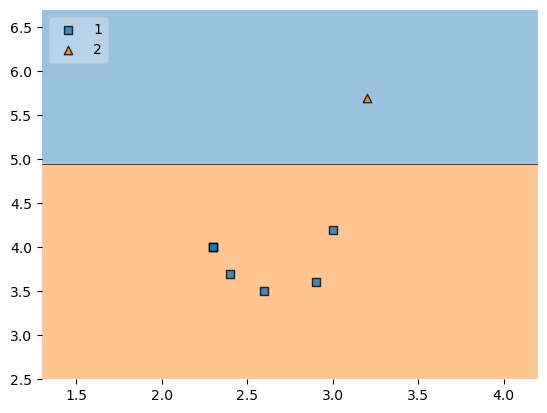

In [35]:
df_bag3 = DecisionTreeClassifier()
evaluate(df_bag3,x,y)

### Prediction

In [47]:
df_test

,sepal_width,petal_length,species
112,3.0,5.5,2
144,3.3,5.7,2
125,3.2,6.0,2
83,2.7,5.1,1
60,2.0,3.5,1


In [46]:
print("Predictor 1", df_bag2.predict(np.array([3,2,4,7]).reshape(4,1)))



C:\Users\Nikita\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 1 features, but DecisionTreeClassifier is expecting 2 features as input.